The data shows the information of American colleges and universities in 1995, the detail as below. And we would like to classify good colleges and universities. <br>
[ACollege1995R.csv] Columns:<br>
app - No. of applicants received<br>
acc - No. of applicants accepted<br>
enrol - No. of new students enrolled<br>
ftime - No. of full-time undergraduates<br>
ptime - No. of part-time undergraduate<br>
instate - In-state tuition<br>
outstate - Out-state tuition<br>
rbcost - Room and board cost<br>
bkcost - Estimated book cost<br>
phd - % of faculty with Ph.D.<br>
sfratio - Student/faculty ratio<br>
expend - Instructional expenditure per student<br>
grad - Graduation rate<br>
good - With 30%+ new students from top 10% high school class.

In [1]:
set.seed(852)
data = read.csv('../ACollege1995R.csv')

In [2]:
TnE_lr = function(train_y, test_x, test_y, model) {
    train_cl = model$fit > 0.5
    train_table = table(train_cl, train_y)
    error0 = (train_table[2] + train_table[3]) / sum(train_table)
    test_pr = predict(model, test_x)
    test_cl = exp(test_pr)/(1+exp(test_pr)) > 0.5
    test_table = table(test_cl, test_y)
    error1 = (test_table[2] + test_table[3]) / sum(test_table)
    print(train_table)
    cat('Training error is',error0,'\n\n')
    print(test_table)
    cat('Testing error is',error1,'\n')
}

In [3]:
id = sample(1:dim(data)[1], size=dim(data)[1]*0.7,replace=F)
train = data[id,]
test = data[-id,]

In [4]:
summary(glm(good~.,data=train,binomial))


Call:
glm(formula = good ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9369  -0.5750  -0.2901   0.0637   3.4441  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.434e+00  1.504e+00  -5.608 2.04e-08 ***
app          4.356e-04  2.290e-04   1.902 0.057136 .  
acc         -9.475e-04  4.299e-04  -2.204 0.027501 *  
enrol        1.870e-03  1.078e-03   1.735 0.082766 .  
ftime        1.621e-05  1.837e-04   0.088 0.929718    
ptime       -1.096e-03  3.139e-04  -3.492 0.000480 ***
instate      1.445e-04  1.144e-04   1.263 0.206490    
outstate    -1.811e-04  1.422e-04  -1.273 0.202882    
rbcost      -4.168e-04  1.710e-04  -2.438 0.014760 *  
bkcost       2.404e-03  1.018e-03   2.362 0.018194 *  
phd          5.668e-02  1.301e-02   4.355 1.33e-05 ***
sfratio     -5.454e-02  5.831e-02  -0.935 0.349542    
expend       3.249e-04  8.926e-05   3.639 0.000273 ***
grad         2.975e-02  1.054e-02   2

In [5]:
lreg = glm(good~ftime+ptime+rbcost+bkcost+phd+expend+grad,data=train,binomial)
summary(lreg)


Call:
glm(formula = good ~ ftime + ptime + rbcost + bkcost + phd + 
    expend + grad, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9827  -0.5607  -0.3111   0.1023   3.2590  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.079e+00  1.047e+00  -8.674  < 2e-16 ***
ftime        1.715e-04  5.665e-05   3.028 0.002463 ** 
ptime       -1.075e-03  2.882e-04  -3.731 0.000191 ***
rbcost      -4.614e-04  1.571e-04  -2.937 0.003314 ** 
bkcost       2.423e-03  9.804e-04   2.472 0.013448 *  
phd          4.671e-02  1.182e-02   3.950 7.81e-05 ***
expend       3.591e-04  5.963e-05   6.022 1.73e-09 ***
grad         3.197e-02  9.547e-03   3.349 0.000811 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 668.99  on 572  degrees of freedom
Residual deviance: 408.77  on 565  degrees of freedom
AIC: 424.77

Number o

In [6]:
TnE_lr(train$good, test[,1:13], test$good, lreg)

        train_y
train_cl   0   1
   FALSE 393  67
   TRUE   25  88
Training error is 0.1605585 

       test_y
test_cl   0   1
  FALSE 165  22
  TRUE    9  50
Testing error is 0.1260163 


# Improvement
Same as models before, logistic regression would be improved by transformations, the script below shows the improvement after log transormation.

Look better now!

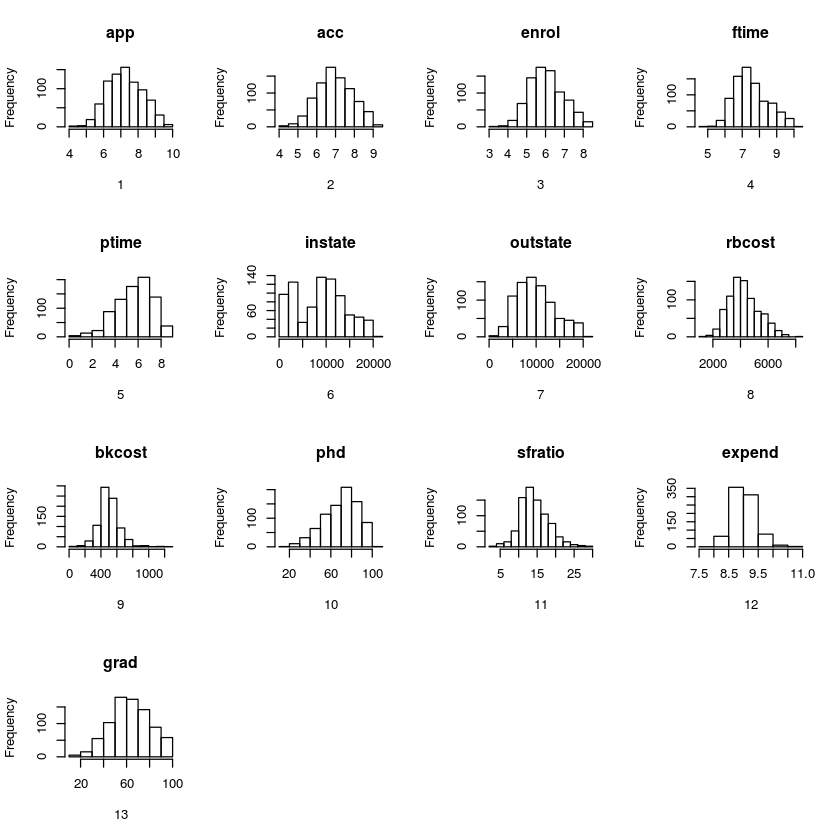

In [7]:
ldata = data
for (i in c(1:5, 12)) {
    ldata[i] = log(data[i])
}
hist_z = as.matrix(ldata[1:13])
par(mfrow=c(4,4))
for (i in 1:13) hist(hist_z[,i], xlab=i, main=colnames(hist_z)[i])
cat('Look better now!')

In [8]:
ltrain = ldata[id,]
ltest = ldata[-id,]

In [9]:
llreg = glm(good~ftime+ptime+rbcost+bkcost+phd+expend+grad,data=ltrain,binomial)
summary(llreg)


Call:
glm(formula = good ~ ftime + ptime + rbcost + bkcost + phd + 
    expend + grad, family = binomial, data = ltrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6158  -0.5494  -0.2971   0.1517   2.7754  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.453e+01  5.110e+00  -6.757 1.41e-11 ***
ftime        5.326e-01  1.944e-01   2.739 0.006166 ** 
ptime       -4.889e-01  1.199e-01  -4.079 4.52e-05 ***
rbcost      -4.009e-04  1.566e-04  -2.560 0.010479 *  
bkcost       2.452e-03  9.861e-04   2.487 0.012884 *  
phd          4.144e-02  1.247e-02   3.323 0.000892 ***
expend       3.004e+00  5.821e-01   5.161 2.46e-07 ***
grad         3.402e-02  9.283e-03   3.665 0.000248 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 668.99  on 572  degrees of freedom
Residual deviance: 412.86  on 565  degrees of freedom
AIC: 428.86

Number 

In [10]:
TnE_lr(ltrain$good, ltest[,1:13], ltest$good, llreg)

        train_y
train_cl   0   1
   FALSE 392  60
   TRUE   26  95
Training error is 0.1500873 

       test_y
test_cl   0   1
  FALSE 166  21
  TRUE    8  51
Testing error is 0.1178862 
